# K Means

Imports for matplotlib for graphing and numpy for numeric operations

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Define some data and constants for this implementation of the algorithm

In [2]:
minimum = 0
maximum = 15

X = np.array([(1, 1),
              (10, 0.5),
              (10, 8),
              (9, 10.1),
              (9.5, 11.5),
              (12, 1),
              (1, 1.01),
              (0.5, 1.3),
              (12.4, 9.8),
              (9.3, 2),
              (1.2, 1)])
n=10
K = 3
colors = ['red', 'green', 'blue']

Part of this algorithm needs to assign each point to a cluster based on the points defined in $M$. We can find where each point belong by finding the squared distance $d = \sqrt{(x_m - x)^2 + (y_m - y)^2}$ between a point $(x, y)$ and the "cluster" $(x_m, y_m)$ defined from $M$. For each point, we choose the cluster that minimizes this distance.

In [3]:
def cluster(X, M):

    Y = []

    for point in X:
        d = [((m[0] - point[0]) ** 2 + (m[1] - point[1]) ** 2) ** 0.5 for m in M]
        Y.append(np.argmin(d))
        
    return Y

The next step in the algorithm is to calculate new clusters based on the groupings of our data. We can set each cluster equation to the average of all the points grouped to this cluster. So $x_m = \frac{\sum_i x_i}{\text{len}(x)}$ and $x_m = \frac{\sum_i y_i}{\text{len}(y)}$ where $x$ and $y$ are the points that belong in the cluster $m$.

In [4]:
def means(X, Y, M):
    X_m = [[] for _ in M]
    for i in range(len(X)):
        X_m[Y[i]].append(X[i])
    averages = []
    for x_m in X_m:
        s = [0, 0]
        for x in x_m:
            s[0] += x[0]
            s[1] += x[1]
        if len(x_m) != 0:
            averages.append([s[0] / len(x_m), s[1] / len(x_m)])
        else:
            averages.append((((maximum + minimum) / 2), (maximum + minimum) / 2))
    return averages

This function plots the data in X in its clusters Y. The difference clusters are visualized by difference colors.

In [5]:
def plot(X, Y, M, colors):
    for j in range(len(M)):
        m = M[j]
        plt.scatter(m[0], m[1], s=100, color=colors[j])
    for i in range(len(X)):
        plt.scatter(X[i][0], X[i][1], color=colors[Y[i]])
    plt.show()

This function goes through the high level outline of an iteration of the K Means algorithm. First we cluster all of the data using our original clusters. Then, we update our clusters based on the averages of the data points in each cluster. Then, if we would like to we can plot our results.

In [6]:
def step(X, M, should_plot=False):
    Y = cluster(X, M)
    if should_plot:
        plot(X, Y, M, colors)
    M = means(X, Y, M)
    return M

To start the algorithm, we must initialize random clusters.

In [7]:
M = []
for k in range(K):
    M.append([np.random.random() * (maximum - minimum) + minimum, np.random.random() * (maximum - minimum) + minimum])

This iterates through through the algorithm $n$ times

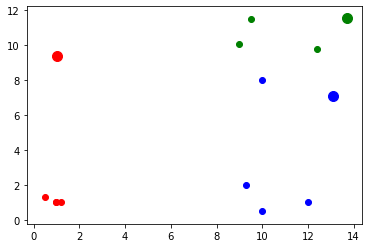

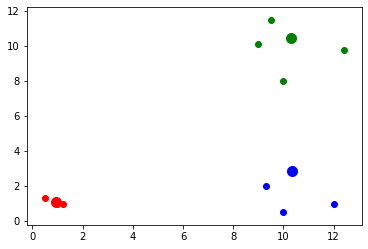

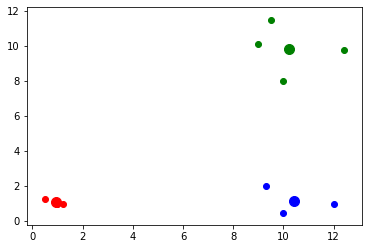

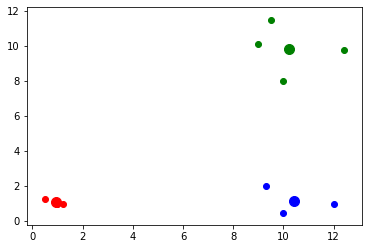

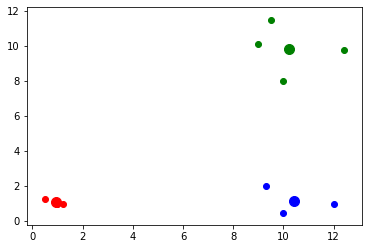

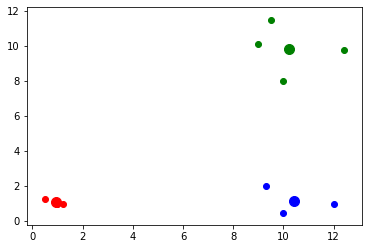

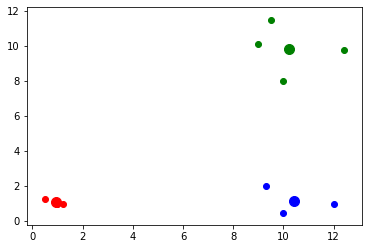

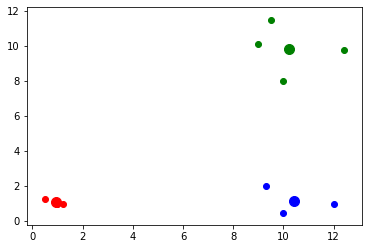

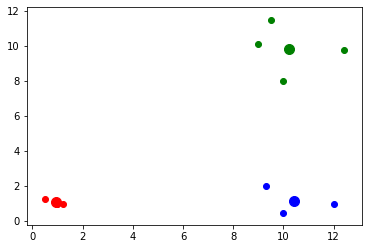

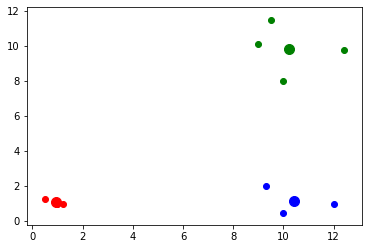

In [8]:
for i in range(n):
    M = step(X, M, True)